In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Example 1: finding $\pi$ thanks to Monte Carlo

This is a wellknown example which allows to get a better overwiew of the use of Monte Carlo's methods in estimation.

The computation of $ \pi $ is based on numerical integration of a quarter circle.

Let $(X_t)_{t \geq 1} \sim [0,1]^{2}$. The probability that $X_t$ falls into the unit disk is $\frac{A}{S} = \frac{\pi}{4}$ where $A$ is the area of a quarter unit disk.

If we define $(Y_t)_{t \geq 1} \sim B(\frac{\pi}{4})$, then $Y_t = 1$ if $X_t$ falls into the unit disk. 

By the Law of Large Numbers,
$$
\lim _{n \rightarrow \infty} \frac{4}{n} \sum_{i=1}^{n} Y_{i}=4 \mathbb{E}\left(Y_{0}\right)=\pi
$$

In [2]:
N = 100_000

# Randomly create coordinates
x = np.random.random(size=N)
y = np.random.random(size=N)

# Is the point inside the unit disk or not ? 
z = (x**2+y**2)<1

# MC estimation
pi_est = 4*z.sum()/N

In [3]:
pi_est

3.13664

[Text(0, 0.5, 'y'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'Computation of $\\pi$ by MC method.')]

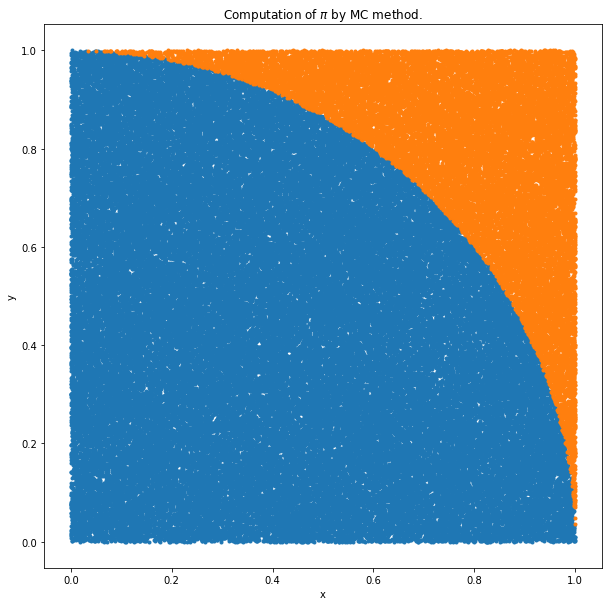

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(x[z], y[z], marker='.')
nz = np.logical_not(z) 
plt.scatter(x[nz], y[nz], marker='.')
ax.set(title=r"Computation of $\pi$ by MC method.", xlabel='x',ylabel='y')

We can also visualize the speed of convergence:

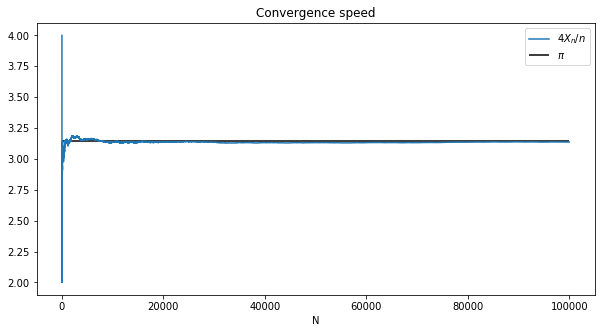

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
conv = 4*np.cumsum(z)/(np.arange(N)+1)
plt.plot(conv, label=r'$4X_n/n$')
plt.hlines(np.pi, 0, N, label=r'$\pi$')
ax.set(title=r"Convergence speed",xlabel='N')
plt.legend()

## Example 2: Random walk

Let's imagine that you are in a square grid and that you can go in 4 different directions while following a random walk. At some point, you would like to know how fare you are from the starting point; and let's stay that you want to find the longest random walk that you can take so that you end up at a maximum distance of 6 ? 

In [6]:
def random_walk(n):
    """
    This function returns the point coordinates after 'n' steps of random walk.
    Args:
    n: number of steps you take during the random walk (int)
    """
    x = 0
    y = 0
    for i in range(n):
        change_x, change_y = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
        x += change_x
        y += change_y
    return (x, y)

In [7]:
N = 100_000 #number of random walks

for i in range(1, 101):
    less_6 = 0 
    for j in range(N):
        (x, y) = random_walk(i)
        dist = abs(x) + abs(y)
        if dist <= 6:
            less_6 += 1
    percent = float( less_6 / N) * 100
    print('Number of steps: ', i , '| % of less than 6 in distance: ', percent)

Number of steps:  1 | % of less than 6 in distance:  100.0
Number of steps:  2 | % of less than 6 in distance:  100.0
Number of steps:  3 | % of less than 6 in distance:  100.0
Number of steps:  4 | % of less than 6 in distance:  100.0
Number of steps:  5 | % of less than 6 in distance:  100.0
Number of steps:  6 | % of less than 6 in distance:  100.0
Number of steps:  7 | % of less than 6 in distance:  96.842
Number of steps:  8 | % of less than 6 in distance:  98.476
Number of steps:  9 | % of less than 6 in distance:  92.342
Number of steps:  10 | % of less than 6 in distance:  95.731
Number of steps:  11 | % of less than 6 in distance:  87.458
Number of steps:  12 | % of less than 6 in distance:  92.539
Number of steps:  13 | % of less than 6 in distance:  82.572
Number of steps:  14 | % of less than 6 in distance:  88.781
Number of steps:  15 | % of less than 6 in distance:  77.735
Number of steps:  16 | % of less than 6 in distance:  85.095
Number of steps:  17 | % of less than 6